<a href="https://colab.research.google.com/github/nailanabq/DataMining/blob/main/Case_Study_02_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Laporan Mixltup Ice Cream**

MxITup adalah perusahaan rintisan yang dimotori para anak muda yang bergerak di bidang usaha Ice Cream, Boba Drinks, dan Desserts (snacks). Saat ini MixITup memiliki 3 cabang di Jakarta, Depok, dan Tangerang. MixITup mendapat respon positif di masyarakat, antrian dine-in dan pesan-antar produk MixITup melebihi kapasitas pelayanan.


In [1]:
# import modul yang akan digunakan
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.preprocessing import MinMaxScaler
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
import tau_unsup as tau

sns.set(style="ticks", color_codes=True)
random_state = 99

--2023-07-21 08:39:40--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17387 (17K) [text/plain]
Saving to: ‘tau_unsup.py’

tau_unsup.py        100%[===================>]  16.98K  --.-KB/s    in 0.001s  

2023-07-21 08:39:40 (16.5 MB/s) - ‘tau_unsup.py’ saved [17387/17387]



In [3]:
try: # Running Locally, yakinkan "file_" berada di folder "data"
    df = pd.read_csv("data/MixlTup.csv", low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/nailanabq/DataMining/main/data/MixlTup.csv
    df = pd.read_csv("data/MixlTup.csv", low_memory = False, encoding='utf8')
df.shape

mkdir: cannot create directory ‘data’: File exists
--2023-07-21 08:40:28--  https://raw.githubusercontent.com/nailanabq/DataMining/main/data/MixlTup.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9054 (8.8K) [text/plain]
Saving to: ‘data/MixlTup.csv.1’

MixlTup.csv.1       100%[===================>]   8.84K  --.-KB/s    in 0s      

2023-07-21 08:40:28 (49.6 MB/s) - ‘data/MixlTup.csv.1’ saved [9054/9054]



(200, 10)

Kita akan cek apakah ada missing values dari data tersebut.

In [ ]:
df.isnull().sum()

ID                       0
Jenis Kelamin            4
Umur                     0
Pendapatan-per-bulan     0
skor-pengeluaran         0
Menikah                 12
Kota                     0
Promo                    6
HariFav                  0
FavFlavor                0
dtype: int64

Dari output diatas terdapat dua kolom yang memiliki missing value yaitu umur dan jenis kelamin. Selanjutnya kita akan cek apa penyebab dari kesalahan tersebut.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   Jenis Kelamin         196 non-null    object 
 2   Umur                  200 non-null    object 
 3   Pendapatan-per-bulan  200 non-null    int64  
 4   skor-pengeluaran      200 non-null    int64  
 5   Menikah               188 non-null    object 
 6   Kota                  200 non-null    object 
 7   Promo                 194 non-null    float64
 8   HariFav               200 non-null    object 
 9   FavFlavor             200 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 15.8+ KB


Dari output di atas terlihat bahwa terdapat beberapa kesalahan pada tipe data. Setelah kami periksa, ternyata pada kolom 'Umur' terdapat kesalahan input data sehingga masih bertipe data object, yang seharusnya umur bertipe data integer.Pada kolom 'Menikah' masih bertipe data object seharusnya category.
Sehingga kami akan perbaiki terlebih dahulu data tersebut.

In [ ]:
df['Jenis Kelamin'] = df['Jenis Kelamin'].replace(['-'],)
df['Umur'] = df['Umur'].replace(["35'"],35)

Terdapat pula kesalahan penginputan pada kolom 'FavFlavor', 'Kota', dan 'Umur'. Pada kesalahan 'FavFlavor' = 9, kami mengasumsikan data tersebut adalah kategori 8. Pada kesalahan 'Kota' = 'JJakarta', kami mengasumsikan data tersebut adalah kategori Jakarta. Pada kesalahan 'Umur' = 2, kami mengasumsikan untuk mengosongkan data tersebut.

In [ ]:
df['FavFlavor'] = df['FavFlavor'].replace([9],8)
df['Kota'] = df['Kota'].replace(['JJakarta'],'Jakarta')
df['Umur'] = df['Umur'].replace(['2'],)

In [ ]:
df['Umur'] = df['Umur'].astype('int64')
df['Menikah'] = df['Menikah'].astype('category')
df['Promo'] = df['Promo'].astype('category')
df['HariFav'] = df['HariFav'].astype('category')
df['FavFlavor'] = df['FavFlavor'].astype('category')
df['Jenis Kelamin'] = df['Jenis Kelamin'].astype('category')
df['Kota'] = df['Kota'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    200 non-null    int64   
 1   Jenis Kelamin         196 non-null    category
 2   Umur                  200 non-null    int64   
 3   Pendapatan-per-bulan  200 non-null    int64   
 4   skor-pengeluaran      200 non-null    int64   
 5   Menikah               188 non-null    category
 6   Kota                  200 non-null    category
 7   Promo                 194 non-null    category
 8   HariFav               200 non-null    category
 9   FavFlavor             200 non-null    category
dtypes: category(6), int64(4)
memory usage: 8.9 KB


Kemudian kami mengubah pula beberapa tipe data kolom lainnya menjadi category.Sehingga dengan ini kolom sudah sesuai dengan tipe datanya.

Berikutnya, kami akan mengisi missing value dengan nilai modus dari masing-masing kolomnya.

In [ ]:
# Imputasi variabel yang terdapat missing value
modus = df['Jenis Kelamin'].mode()[0]
df['Jenis Kelamin'] = df['Jenis Kelamin'].fillna(modus)

modus2 = df['Menikah'].mode()[0]
df['Menikah'] = df['Menikah'].fillna(modus2)

modus3 = df['Umur'].mode()[0]
df['Umur'] = df['Umur'].fillna(modus3)

In [ ]:
df.isnull().sum()

ID                      0
Jenis Kelamin           0
Umur                    0
Pendapatan-per-bulan    0
skor-pengeluaran        0
Menikah                 0
Kota                    0
Promo                   6
HariFav                 0
FavFlavor               0
dtype: int64

Terlihat bahwa sudah tidak terdapat lagi missing value dari data. Berikutnya akan diperiksa apakah terdapat duplikasi data.

In [ ]:
df.duplicated().sum()

0

Dari output di atas terlihat bahwa tidak terdapat duplikasi data.

Lakukan Grouping data kemudian akan di cek outlier di masing masing kota

In [ ]:
grouped_lokasi= df.groupby(['Kota'])
kota_jakarta = grouped_lokasi.get_group('Jakarta')
kota_jakarta.head()

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8
6,107,Pria,27,21311475,56,1,Jakarta,1.0,Senin,5


In [ ]:
grouped_lokasi= df.groupby(['Kota'])
kota_depok = grouped_lokasi.get_group('Depok')
kota_depok.head()

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
5,106,Wanita,33,29098360,95,1,Depok,0.0,Senin,0
7,108,Wanita,24,2049180,77,1,Depok,1.0,Senin,3
11,112,Pria,36,29508196,92,1,Depok,0.0,Jumat,0
17,118,Wanita,32,25000000,87,1,Depok,1.0,Kamis,8


In [ ]:
grouped_lokasi= df.groupby(['Kota'])
kota_tangerang = grouped_lokasi.get_group('Tangerang')
kota_tangerang.head()

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
12,113,Pria,46,34016393,15,1,Tangerang,3.0,Selasa,7
13,114,Pria,60,6147540,4,1,Tangerang,3.0,Sabtu,4
14,115,Wanita,58,2049180,15,1,Tangerang,5.0,Sabtu,8
16,117,Wanita,47,25819672,16,1,Tangerang,3.0,Sabtu,1
18,119,Wanita,45,5327868,32,1,Tangerang,3.0,Sabtu,3


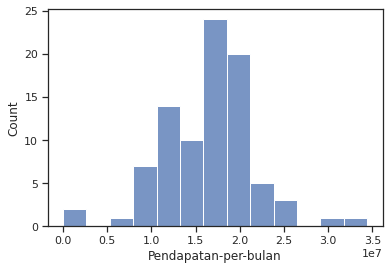

In [ ]:
sns.histplot(data=kota_jakarta, x='Pendapatan-per-bulan')

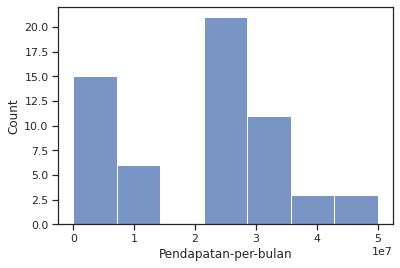

In [ ]:
sns.histplot(data=kota_depok, x='Pendapatan-per-bulan')

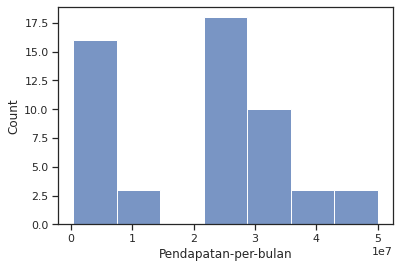

In [ ]:
sns.histplot(data=kota_tangerang, x='Pendapatan-per-bulan')

Dari ketiga grafik histogram pendapatan-per-bulan dari masing-masing kota, terlihat data cenderung sudah cukup baik (tidak terlihat outlier), tetapi akan kita cek kembali pada keseluruhan.

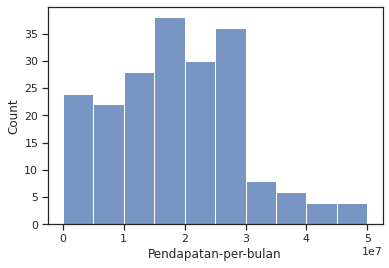

In [ ]:
sns.histplot(data=df, x='Pendapatan-per-bulan')

Terlihat data cenderung sudah cukup baik (tidak terdapat outlier) pada pendapatan-per-bulan jika kita lihat dari keseluruhan kota, sehingga dapat kita lakukan EDA.

# EDA

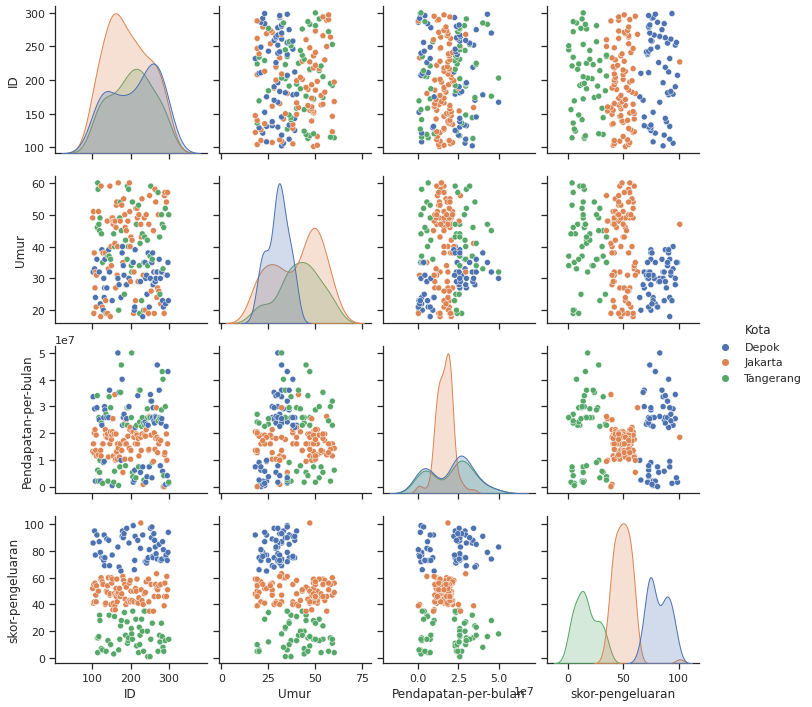

In [ ]:
g = sns.pairplot(df, hue="Kota")

Dari output di atas, kita mendapatkan gambaran umum dari data yang sudah di kelola yang akan kita interpretasikan.

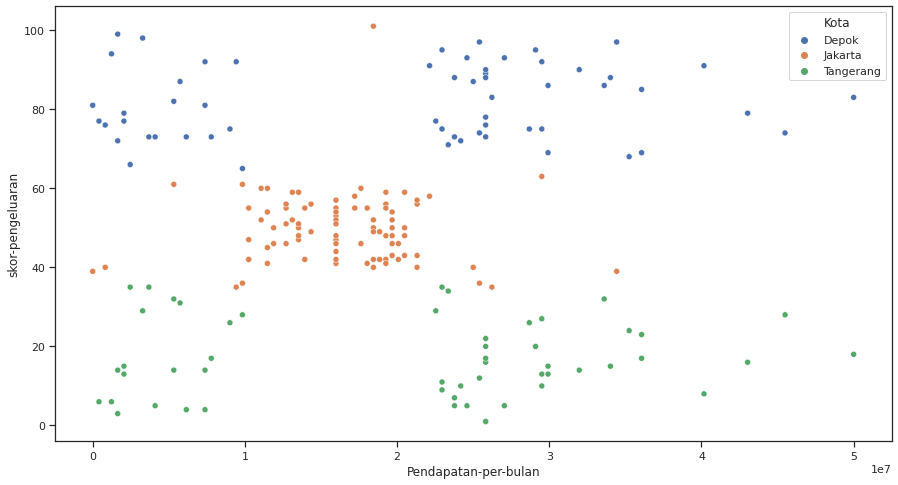

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='Pendapatan-per-bulan', y='skor-pengeluaran', hue='Kota')

Dapat kita asumsikan bahwa di kota Jakarta cenderung memiliki pendapatan per bulan kelas menengah dengan skor yang menengah, kemudian di kota Depok dan Tangerang mayoritas cenderung memiliki pendapatan per bulan dan skor pengeluaran yang tinggi pula.

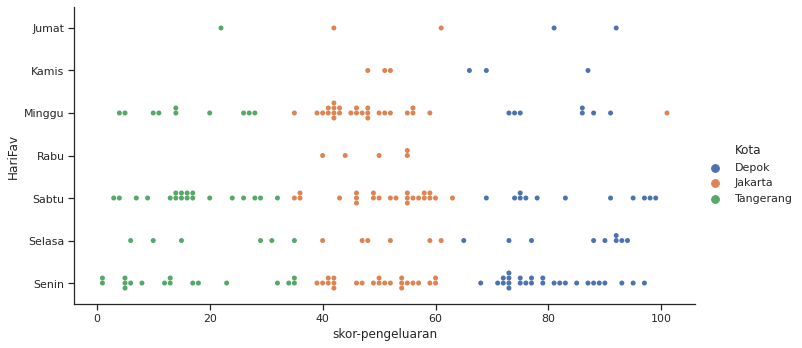

In [ ]:
sns.catplot(data=df, x='skor-pengeluaran', y='HariFav', hue='Kota', kind='swarm', height=5, aspect=2)

Dapat kita asumsikan bahwa Kedai ramai di hari weekend yaitu Sabtu dan Minggu kemudian di weekday cenderung ramai pada hari senin. didapatkan pula bahwa kedai cenderung sepi pembeli pada hari Selasa, Rabu, Kamis dan Jumat. Sehingga kami merekomendasikan untuk memberikan promo pada hari Selasa, Rabu, Kamis dan Jumat untuk memberikan massive marketing ke pelanggan sehingga kedai dapat menjadi lebih ramai pada hari-hari tersebut.

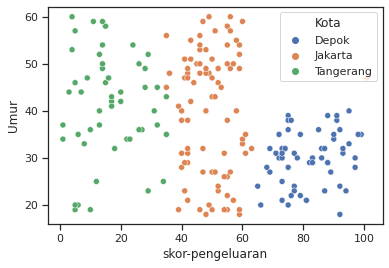

In [ ]:
sns.scatterplot(data=df, x='skor-pengeluaran', y='Umur', hue='Kota')

Dari output di atas dapat diasumsikan bahwa di kota Jakarta dan Tangerang cenderung memiliki pelanggan dari rentang umur 20-60 tahun dan di kota depok cenderung memiliki pelanggan dari rentang umur 20-40 tahun. Sehingga kami merekomendasikan untuk kedai kota Depok agar dapat membuat varian es krim yang dapat menarik minat pelanggan dari rentang umur 40 tahun ke atas.

In [ ]:
min(df['Umur'])

18

Kami juga melihat bahwa konsumen termuda pada kedai Mixltup berusia 18 tahun. Kami merekomendasikan untuk membuat menu baru dengan topping yang cocok untuk anak-anak, sehingga konsumen tidak hanya berasal dari kalangan dewasa saja.

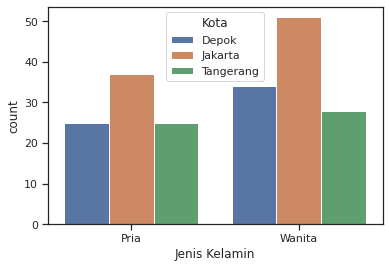

In [ ]:
sns.countplot(data=df, x='Jenis Kelamin', hue='Kota')

Dari plot di atas dapat diasumsikan bahwa konsumen kedai Mixltup cenderung diminati oleh wanita dibandingkan dengan pria. Sehingga kami menyarankan untuk memberikan space ruang khusus di kedai untuk pria seperti halnya ruangan khusus merokok agar dapat menarik minat pria datang ke kedai yang kita miliki. Kami juga menyarankan untuk menambah varian es krim coffee yang mayoritas disukai oleh pria.

#Clustering

In [ ]:
X = df[['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']]
min_max_scaler = MinMaxScaler()
df2 = pd.DataFrame(min_max_scaler.fit_transform(X), columns=['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran'])

In [ ]:
X

,Umur,Pendapatan-per-bulan,skor-pengeluaran
0,49,13114754,52
1,32,33606557,86
2,51,15983606,41
3,19,12704918,55
4,38,20081967,42
...,...,...,...
195,31,4098360,73
196,57,15983606,51
197,35,43032786,79
198,23,1229508,94


Text(0.5, 1.0, 'Elbow curve')

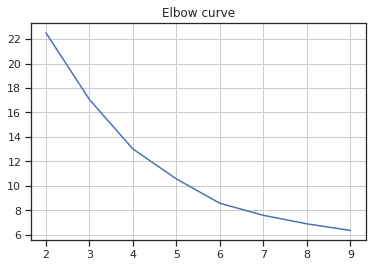

In [ ]:
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(df2)
    distorsions.append(kmeans.inertia_)

plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

Dari elbow curve terlihat bahwa terjadi grafik yang penurunan yang cukup curam dari 3 ke 4, maka kami memilih untuk melakukan clustering 4 cluster.

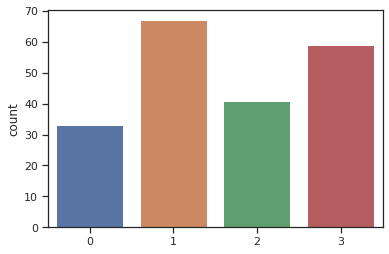

In [ ]:
# K-Means
k = 4
km = cluster.KMeans(n_clusters=k, init='random', random_state = 0)
km.fit(df2)
# Hasil clusteringnya
C_km = km.predict(df2)
p = sns.countplot(x=C_km)


In [ ]:
C_km

array([1, 2, 1, 3, 1, 2, 3, 3, 3, 3, 3, 2, 0, 1, 1, 1, 0, 2, 1, 1, 3, 3,
       1, 0, 2, 3, 1, 1, 3, 2, 3, 2, 2, 0, 3, 0, 3, 2, 1, 3, 1, 3, 2, 0,
       2, 1, 3, 0, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 3, 1, 1, 1, 3, 1,
       2, 1, 3, 2, 1, 1, 1, 0, 3, 0, 1, 2, 2, 3, 2, 1, 2, 3, 1, 1, 1, 3,
       1, 2, 0, 1, 1, 0, 0, 2, 1, 1, 2, 3, 1, 0, 0, 1, 1, 3, 3, 3, 3, 3,
       3, 2, 3, 1, 1, 0, 1, 1, 2, 3, 1, 1, 0, 0, 0, 3, 2, 1, 3, 1, 0, 3,
       3, 0, 3, 1, 0, 2, 3, 3, 1, 2, 3, 0, 0, 2, 3, 1, 3, 1, 0, 2, 0, 3,
       2, 3, 1, 2, 2, 1, 2, 3, 2, 1, 2, 1, 2, 2, 3, 2, 3, 0, 1, 3, 2, 0,
       0, 3, 3, 2, 0, 2, 0, 3, 0, 3, 1, 3, 1, 1, 0, 3, 2, 1, 3, 3, 1, 2,
       3, 1], dtype=int32)

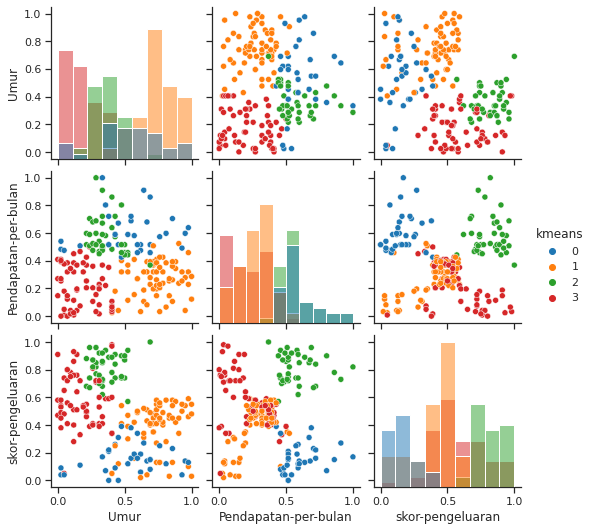

In [ ]:
g = sns.pairplot(df2.assign(kmeans = C_km), hue="kmeans", diag_kind="hist", palette="tab10")

dapat kita asumsikan bahwa untuk masyarakat yang umurnya cenderung muda akan bisa menghabiskan pengeluaran yang lebih besar dibandingkan yang lebi tua dalam pembelian minuman ini, kemudian pada pendapatan perbulan pun cenderung kaum muda akan lebih besar dibandungkan kaum tua

In [ ]:
km.inertia_

13.020415104970937

array([1, 2, 1, 3, 1, 2, 3, 3, 3, 3], dtype=int32)

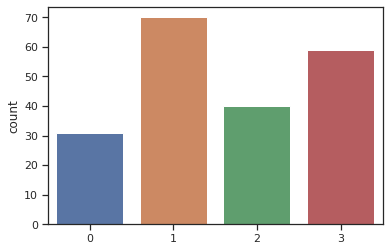

In [ ]:
# k-means++ clustering http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
k = 4
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
kmPP.fit(df2)
C_kmpp = kmPP.predict(df2)
sns.countplot(x=C_kmpp)
C_kmpp[:10]

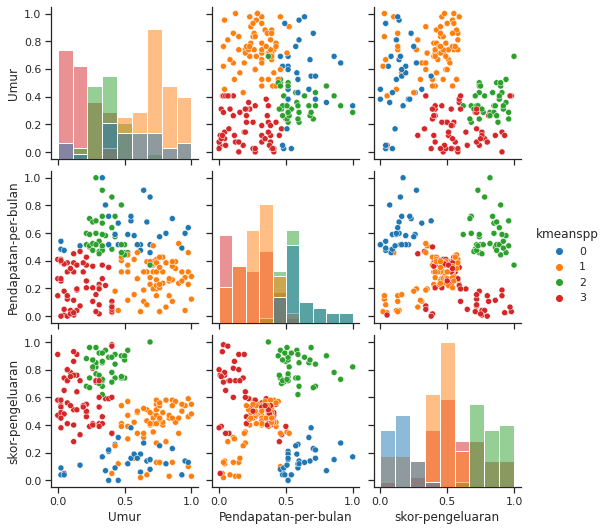

In [ ]:
g = sns.pairplot(df2.assign(kmeanspp = C_kmpp), hue="kmeanspp", diag_kind="hist", palette="tab10")

In [ ]:
kmPP.inertia_

13.018241600175514

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


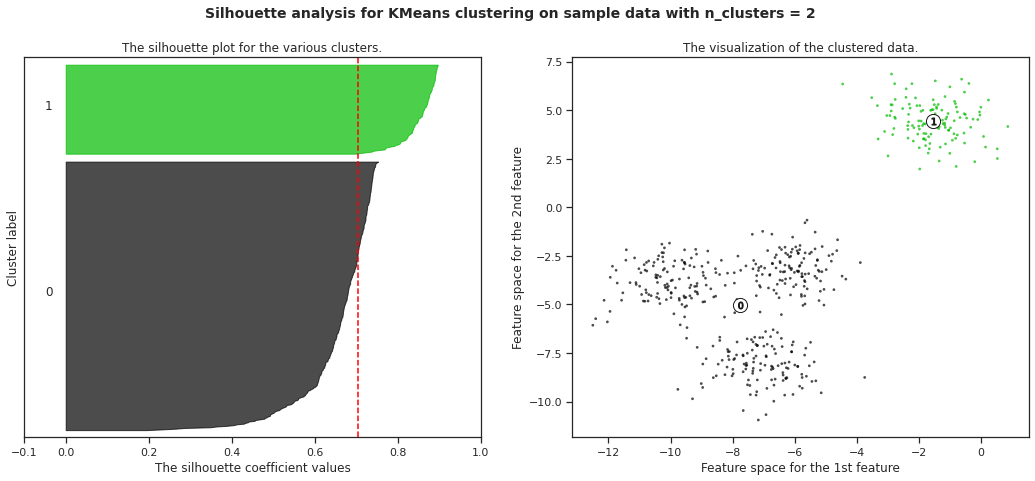

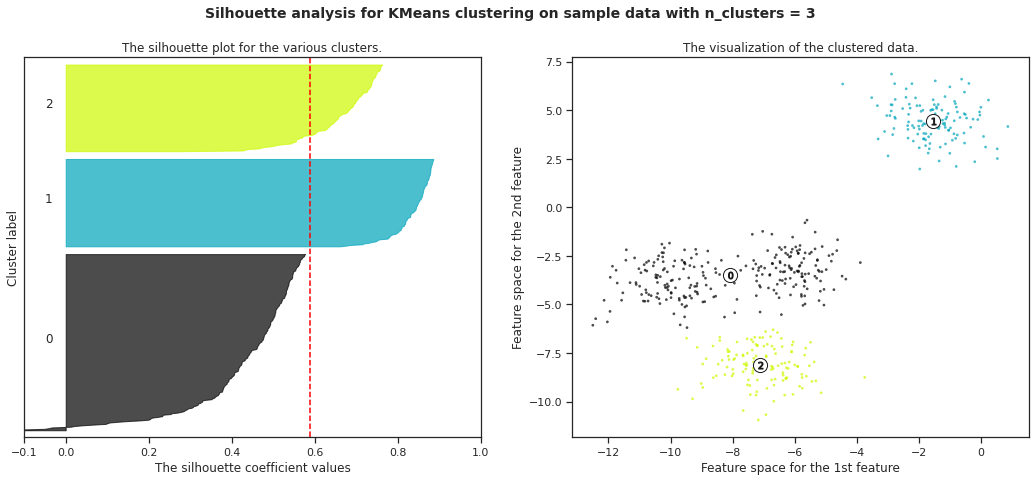

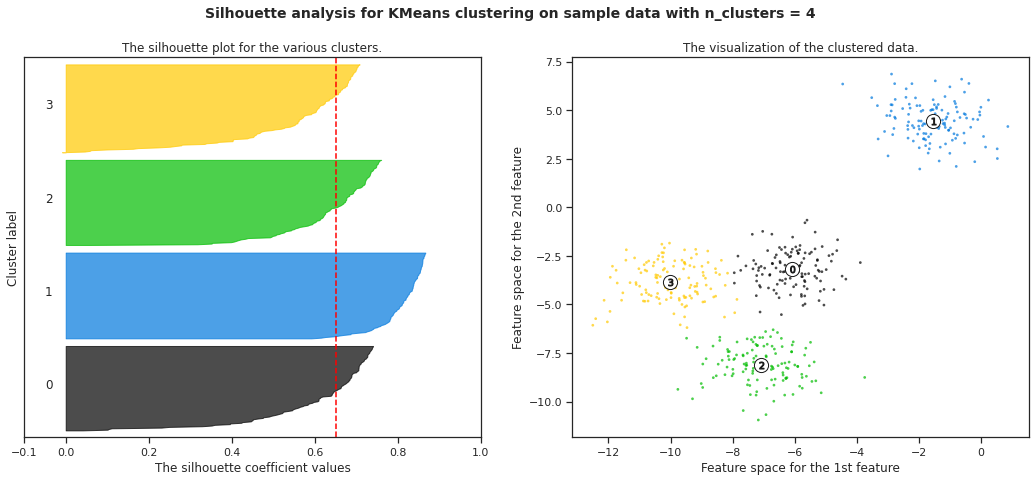

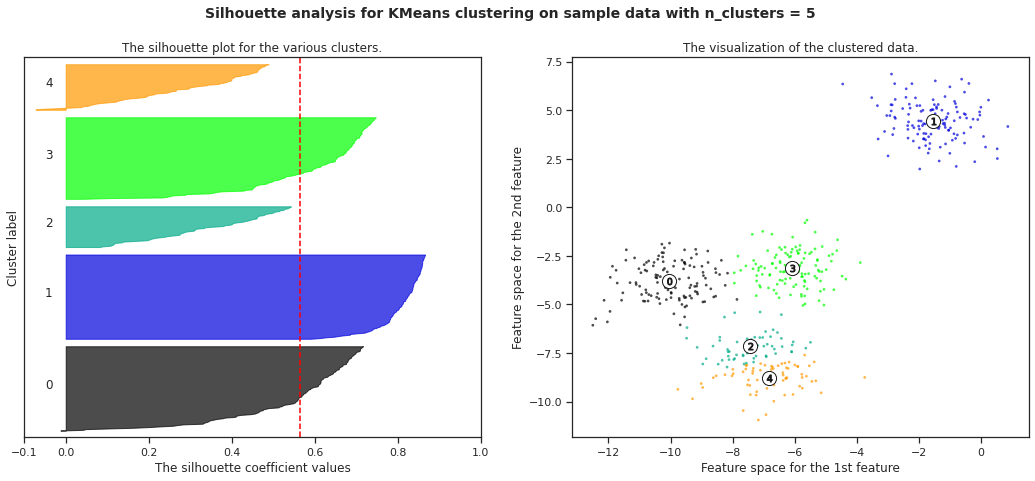

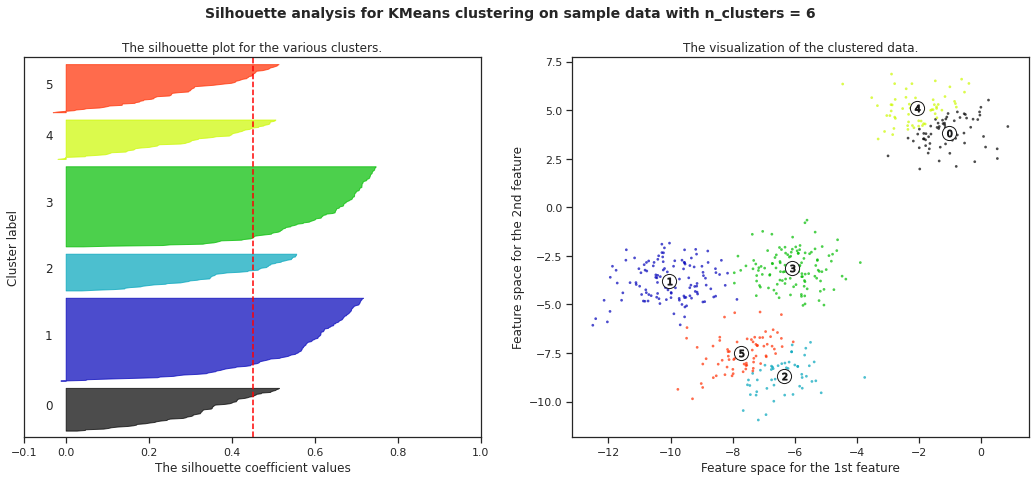

In [ ]:
tau.sil_based_optimal_km()

Setelah kami lakukan clustering dengan K-Means dan K-Means++ dengan range 2-6 kluster, kita dapat asumsikan cenderung untuk mengambil 4 kluster dikarenakan dari hasil silhoutte analysis kita dapatkan hasil ploting data lebih menyeluruh dan lebih menangkap data sehingga menjadi bulatan hampir sempurna maka kita dapat kelompokan menjadi 4 circle agar dapat menghasilkan clustering yang baik dengan karakteristik yang sama

#Kesimpulan


*   Dapat kita asumsikan bahwa di kota Jakarta cenderung memiliki pendapatan per bulan kelas menengah dengan skor yang menengah, kemudian di kota Depok dan Tangerang mayoritas cenderung memiliki pendapatan per bulan dan skor pengeluaran yang tinggi pula.
*   Dapat kita asumsikan bahwa kedai pada umumnya ramai pada weekend sabtu dan minggu, untuk weekday ramai pada hari senin

*   Dapat kita asumsikan bahwa kedai di kota jakarta dan tangerang cenderung memiliki konsumen dari rentang umur 20-60 tahun, namun pada kota depok cenderung memiliki konsumen dari rentang umut 20-40 tahun, dan kami menemukan info menarik yaitu terdapat konsumen termuda dengan umur 18 tahun
*   Dapat kita asumsikan bahwa konsumen kedai lebih banyak wanita daripada pria

Dengan 4 Kluster kita dapatkan hasil circle yang baik dibandingkan kluster lain, dilihat dari bentuk bulatan yang dihasilkan lebih sempurna dari yang lain







#Saran


Kami ingin menyarankan


*   Untuk weekday khususnya pada hari selasa - jumat dapat diberikan promo agar dapat menarik minat konsumen dan massive marketing
*   Untuk kedai depok kami menyarankan agar bisa menambahkan varian baru untuk usia 40 tahun keatas


*   Untuk seluruh kedai dapat dibuatkan area smoking dan juga ditambahkan varian kopi untuk berkumpulnya kaum pria agar dapar meningkatkan konsumen pria
*   Terkait jam buka, kami menyarankan untuk dapat kembali mengatur jam operasional dengan mempertimbangkan jam kerja para konsumen terkhusus di hari weekday







